# Sampling from a GP

## Preliminary steps

### Loading necessary packages

In [1]:
using Plots
using AugmentedGaussianProcesses
using Distributions
using LinearAlgebra

### Loading the banana dataset from OpenML

In [2]:
kernel = SqExponentialKernel()
x = range(0, 10, length=50)
K = kernelmatrix(kernel, x)
f = rand(MvNormal(K + 1e-8I)) # Sample a random GP
y = rand.(Bernoulli.(AGP.logistic.(f)))
y_sign = sign.(y .- 0.5)

50-element Vector{Float64}:
 -1.0
 -1.0
 -1.0
  1.0
 -1.0
 -1.0
  1.0
 -1.0
 -1.0
  1.0
  ⋮
 -1.0
 -1.0
 -1.0
  1.0
 -1.0
  1.0
  1.0
  1.0
  1.0

### We create a function to visualize the data

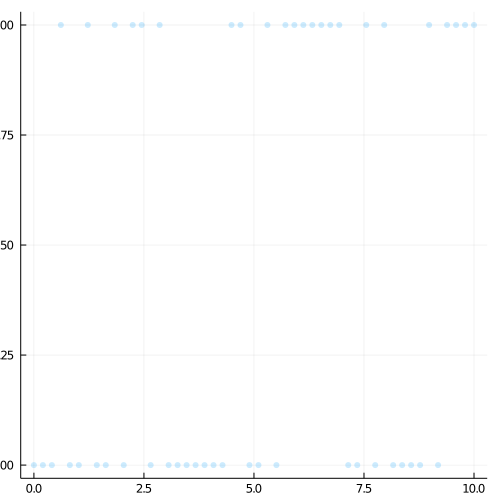

In [3]:
function plot_data(x, y; size=(300,500))
    Plots.scatter(x,
                y,
                alpha=0.2,
                markerstrokewidth=0.0,
                lab="",
                size=size
            )
end
plot_data(x, y; size = (500, 500))

### Run the variational gaussian process approximation

In [4]:
@info "Running full model"
mfull = VGP(x, y_sign,
            kernel,
            LogisticLikelihood(),
            AnalyticVI(),
            optimiser = false
            )
@time train!(mfull, 5)

┌ Info: Running full model
└ @ Main.##475 string:1
  0.629360 seconds (1.14 M allocations: 66.277 MiB, 99.43% compilation time)


### We can also create a sampling based model

In [5]:
@info "Sampling from model"
mmcmc = MCGP(x, y,
            kernel,
            LogisticLikelihood(),
            GibbsSampling(),
            optimiser = false
            )
m = mmcmc
@time samples = sample(mmcmc, 1000)

┌ Info: Sampling from model
└ @ Main.##475 string:1
Sampling with Gibbs Sampler   0%|                       |  ETA: N/A
Sampling with Gibbs Sampler   0%|▏                      |  ETA: 0:05:51
Sampling with Gibbs Sampler   1%|▎                      |  ETA: 0:02:58
Sampling with Gibbs Sampler   1%|▍                      |  ETA: 0:01:58
Sampling with Gibbs Sampler   2%|▍                      |  ETA: 0:01:28
Sampling with Gibbs Sampler   2%|▌                      |  ETA: 0:01:10
Sampling with Gibbs Sampler   3%|▋                      |  ETA: 0:00:58
Sampling with Gibbs Sampler   3%|▊                      |  ETA: 0:00:50
Sampling with Gibbs Sampler   4%|▉                      |  ETA: 0:00:44
Sampling with Gibbs Sampler   4%|█                      |  ETA: 0:00:39
Sampling with Gibbs Sampler   5%|█                      |  ETA: 0:00:35
Sampling with Gibbs Sampler   5%|█▏                     |  ETA: 0:00:31
Sampling with Gibbs Sampler   5%|█▎                     |  ETA: 0:00:29
Sampling with Gi

1000-element Vector{Vector{Vector{Float64}}}:
 [[-1.3974060027106259, -1.1545682051240607, -1.026372376606182, -0.9297847152620585, -0.8768570379823606, -0.8406192749404671, -0.7477532163816016, -0.5653402768872713, -0.3339809611320675, -0.052267635769494614  …  -0.1980007242747822, -0.5106512803240326, -0.7001794305583093, -0.7469161860176671, -0.6749136233768407, -0.5289924345288565, -0.2941949780336669, -0.07018962695845166, 0.16916719943055952, 0.4195605678901758]]
 [[-0.8606302413167455, -0.9835817515773289, -1.0449378409728163, -1.004855894921047, -0.9193273681042207, -0.7778219969137499, -0.6827832859405636, -0.6071325569330307, -0.5637381422509589, -0.49849731664191554  …  -0.9828431591672944, -1.0207518050094058, -0.9244537016087452, -0.6347075819928173, -0.24948102204000616, 0.24246366593070173, 0.7376599857716111, 1.1719122245642195, 1.4756352549891545, 1.6244395338527384]]
 [[-0.5835436891017246, -0.7757757531096837, -0.917465575994605, -0.9551048065132725, -0.8860614002233

### We can now visualize the results of both models

### We first plot the latent function f (truth, the VI estimate, the samples)

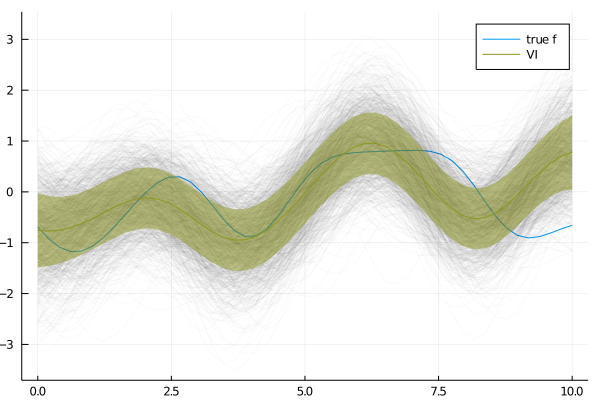

In [6]:
p1 = plot(x, f, label="true f")
plot!(x, samples, label="", color=:black, alpha=0.02, lab="")
plot!(x, mean(mfull[1]), ribbon=sqrt.(var(mfull[1])), label="VI")

### And we can also plot the predictions vs the data

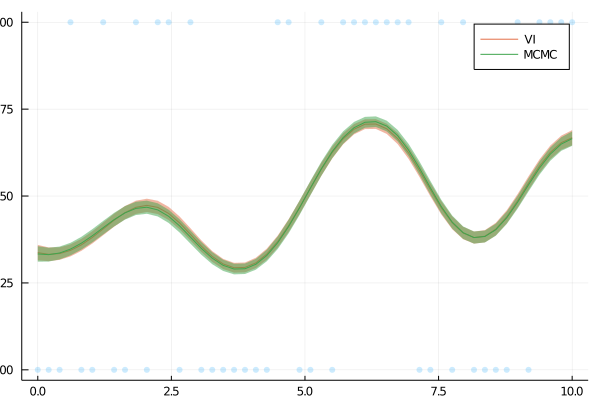

In [7]:
p2 = plot_data(x, y; size=(600,400))
μ_vi, σ_vi = proba_y(mfull, x)
plot!(x, μ_vi; ribbon=σ_vi, label="VI")
μ_mcmc, σ_mcmc = proba_y(mmcmc, x)
plot!(x, μ_mcmc; ribbon=σ_mcmc, label="MCMC")

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*